In [ ]:
import pandas as pd
df = pd.read_excel('health_data.xlsx')
df.head(3)

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target,heart rate,temperature,blood pressure,o2,abdnormal,Unnamed: 19
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1,125,98.6,107,93,yes,NaN
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1,100,98.6,109,96,yes,NaN
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1,94,98.6,86,94,yes,NaN


In [ ]:
df.isnull().sum()

age                 0
sex                 0
cp                  0
trestbps            0
chol                0
fbs                 0
restecg             0
thalach             0
exang               0
oldpeak             0
slope               0
ca                  0
thal                0
target              0
heart rate          0
temperature         0
blood pressure      0
o2                  0
abdnormal           0
Unnamed: 19       302
dtype: int64

In [ ]:
print('Missing values: ',sum(df.isnull().sum()))

Missing values:  302


In [ ]:
del df['Unnamed: 19']

In [ ]:
print('Missing values: ',sum(df.isnull().sum()))

Missing values:  0


In [ ]:
variables = [variable for variable in df.columns if variable not in ['target','slope']]

conts = ['age','chol','o2']

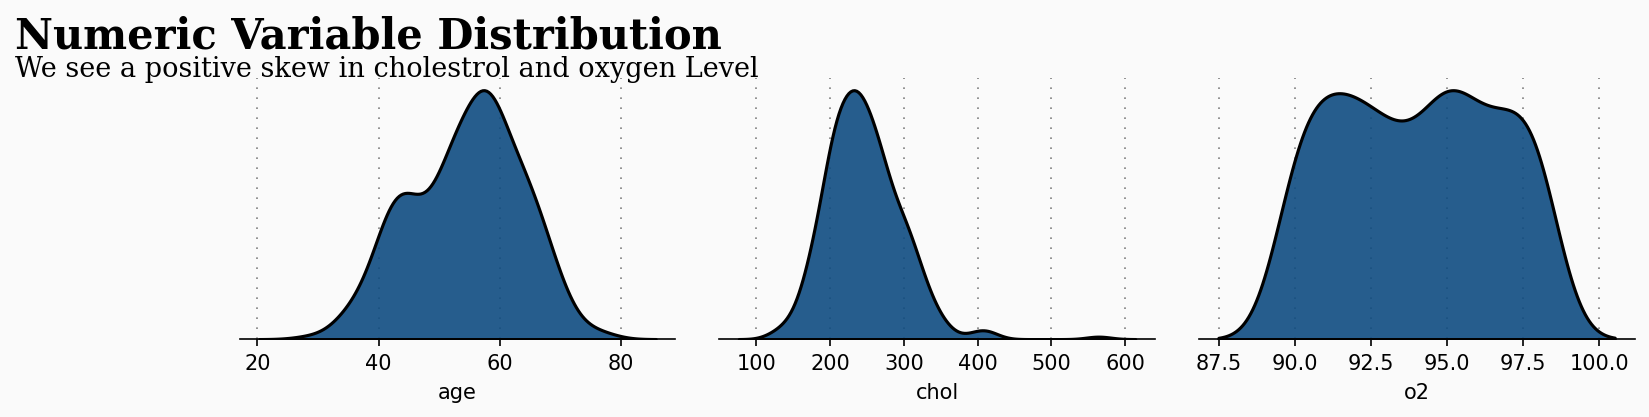

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
fig = plt.figure(figsize=(12, 12), dpi=150, facecolor='#fafafa')
gs = fig.add_gridspec(4, 3)
gs.update(wspace=0.1, hspace=0.4)

background_color = "#fafafa"

plot = 0
for row in range(0, 1):
    for col in range(0, 3):
        locals()["ax"+str(plot)] = fig.add_subplot(gs[row, col])
        locals()["ax"+str(plot)].set_facecolor(background_color)
        locals()["ax"+str(plot)].tick_params(axis='y', left=False)
        locals()["ax"+str(plot)].get_yaxis().set_visible(False)
        for s in ["top","right","left"]:
            locals()["ax"+str(plot)].spines[s].set_visible(False)
        plot += 1

plot = 0
for variable in conts:
        sns.kdeplot(df[variable] ,ax=locals()["ax"+str(plot)], color='#0f4c81', shade=True, linewidth=1.5, ec='black',alpha=0.9, zorder=3, legend=False)
        locals()["ax"+str(plot)].grid(which='major', axis='x', zorder=0, color='gray', linestyle=':', dashes=(1,5))
        #locals()["ax"+str(plot)].set_xlabel(variable) removed this for aesthetics
        plot += 1

ax0.set_xlabel('age')
ax1.set_xlabel('chol')
ax2.set_xlabel('o2')


ax0.text(-20, 0.050, 'Numeric Variable Distribution', fontsize=20, fontweight='bold', fontfamily='serif')
ax0.text(-20, 0.045, 'We see a positive skew in cholestrol and oxygen Level', fontsize=13, fontweight='light', fontfamily='serif')

plt.show()

In [ ]:
# Inverse of Null Accuracy
print('Inverse of Null Accuracy: ',249/(249+4861))
print('Null Accuracy: ',4861/(4861+249))

Inverse of Null Accuracy:  0.0487279843444227
Null Accuracy:  0.9512720156555773


In [ ]:
#KNN Algorithm-Importing the modules
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt

from sklearn.datasets import make_blobs
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split
#Step 2: Importing the dataset
X, y = make_blobs(n_samples = 500, n_features = 2, centers = 4,cluster_std = 1.5, random_state = 4)

from sklearn.model_selection import train_test_split


X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.4, random_state=10)

In [ ]:
X_test.head(2)

AttributeError: ignored

In [ ]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All"
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

import matplotlib.pyplot as plt
import matplotlib.ticker as mtick
import matplotlib.gridspec as grid_spec
import seaborn as sns
from imblearn.over_sampling import SMOTE
!pip install scikit-plot
import scikitplot as skplt


from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler,LabelEncoder
from sklearn.model_selection import train_test_split,cross_val_score


from sklearn.linear_model import LinearRegression,LogisticRegression
from sklearn.tree import DecisionTreeRegressor,DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC

from sklearn.metrics import classification_report, confusion_matrix
from sklearn.metrics import accuracy_score, recall_score, roc_auc_score, precision_score, f1_score
import warnings
warnings.filterwarnings('ignore')
!pip install pywaffle


Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
# A really fantsatic and intelligent way to deal with blanks, from Thoman Konstantin in: https://www.kaggle.com/thomaskonstantin/analyzing-and-modeling-stroke-data

DT_age_pipe = Pipeline( steps=[
                               ('scale',StandardScaler()),
                               ('lr',DecisionTreeRegressor(random_state=42))
                              ])
#X = df[['age','chol','heart rate']].copy()
#X.gender = X.gender.replace({'Male':0,'Female':1,'Other':-1}).astype(np.uint8)

#Missing = X[X.age.isna()]
#X = X[~X.age.isna()]
#Y = X.pop('age')
DT_age_pipe.fit(X,y)

Pipeline(steps=[('scale', StandardScaler()),
                ('lr', DecisionTreeRegressor(random_state=42))])

In [ ]:
# Models
# Scale our data in pipeline, then split
rf_pipeline = Pipeline(steps = [('scale',StandardScaler()),('RF',RandomForestClassifier(random_state=42))])
svm_pipeline = Pipeline(steps = [('scale',StandardScaler()),('SVM',SVC(random_state=42))])
logreg_pipeline = Pipeline(steps = [('scale',StandardScaler()),('LR',LogisticRegression(random_state=42))])

In [ ]:
rf_cv = cross_val_score(rf_pipeline,X_train,y_train,cv=10,scoring='f1')
svm_cv = cross_val_score(svm_pipeline,X_train,y_train,cv=10,scoring='f1')
logreg_cv = cross_val_score(logreg_pipeline,X_train,y_train,cv=10,scoring='f1')

In [ ]:
oversample=SMOTE()
X_train_resh, y_train_resh = oversample.fit_resample(X_train, y_train.ravel())

In [ ]:
print('Mean f1 scores:')
print('Random Forest mean :',cross_val_score(rf_pipeline,X_train_resh,y_train_resh,cv=10,scoring='f1').mean())
print('SVM mean :',cross_val_score(svm_pipeline,X_train_resh,y_train_resh,cv=10,scoring='f1').mean())
print('Logistic Regression mean :',cross_val_score(logreg_pipeline,X_train_resh,y_train_resh,cv=10,scoring='f1').mean())

Mean f1 scores:
Random Forest mean : nan
SVM mean : nan
Logistic Regression mean : nan
